In [1]:
# импортируем нужный модуль k-means-кластеризации
from sklearn.cluster import KMeans
import pandas as pd

df = pd.read_csv('data/values.csv')

df

,x1,x2
0,48.848600,67.882051
1,60.343304,74.215686
2,48.155670,68.313920
3,48.546786,68.090451
4,47.124609,67.132278
...,...,...
995,64.147007,59.058766
996,48.973928,67.454876
997,62.605739,58.633415
998,47.122895,67.308920


<Axes: xlabel='x1', ylabel='x2'>

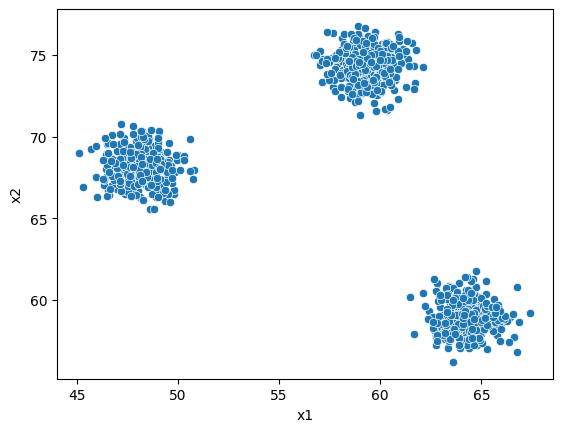

In [2]:
import seaborn as sns
sns.scatterplot(x=df.x1, y=df.x2,)

c:\Users\Michael Brown\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Michael Brown\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Michael Brown\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Michael Brown\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 

<Axes: xlabel='cluster', ylabel='inertia'>

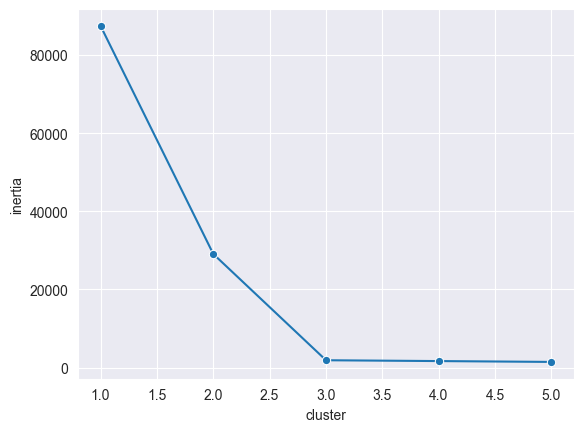

In [3]:
# функция, которая принимает количество кластеров для k-means и матрицу с признаками объектов,и возвращает инерцию 
def get_inertia(cluster_num, X):
# инициализируем алгоритм кластеризации
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
# запускаем алгоритм k-means
    k_means.fit(X)
# находим значение инерции
    inertia = k_means.inertia_
# возвращаем значение инерции
    return inertia

# создадим пустой словарь, ключами будут инерция и количество кластеров
res = {"inertia": [], "cluster": []}

# выберем нужные данные 
X = df[['x1', 'x2']]

# итерируемся по разным размерам кластеров (от 1 до 9) и сохраним значение инерции для каждого кластера
for cluster_num in range(1, 6):
# сохраняем значения
    res["inertia"].append(get_inertia(cluster_num, X))
    res["cluster"].append(cluster_num)

# сохраним в датафрейм значение инерции и количество кластеров
res_df = pd.DataFrame(res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=res_df, x="cluster", y="inertia", marker= "o")

<Axes: xlabel='x1', ylabel='x2'>

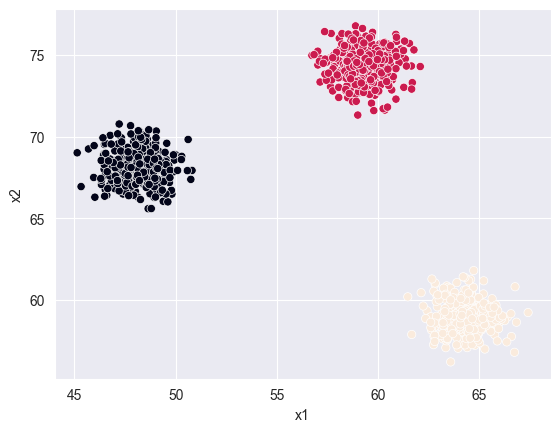

In [4]:
# инициализируем алгоритм k-means, с количеством кластеров 3
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)

# запустим обучение модели
kmeans.fit(X)

# предскажем, к какому кластеру принадлежат покемоны 
predictions = kmeans.predict(X)
# если мы хотим метки класса для тех же данных, на которых обучили модель, то можно просто попросить labels
predictions = kmeans.labels_

# сохраним предсказания в датафрейм
df['Clusters_k3'] = predictions

#визуализируем результаты, параметр c принимает вектор с номерами классов, для группировки объектов по цветам 
sns.scatterplot(x=df.x1, y=df.x2, c=predictions)

In [5]:
df

,x1,x2,Clusters_k3
0,48.848600,67.882051,0
1,60.343304,74.215686,1
2,48.155670,68.313920,0
3,48.546786,68.090451,0
4,47.124609,67.132278,0
...,...,...,...
995,64.147007,59.058766,2
996,48.973928,67.454876,0
997,62.605739,58.633415,2
998,47.122895,67.308920,0


In [6]:
# импортируем подсчёт метрики однородности кластеров
from sklearn.metrics.cluster import homogeneity_score

# передаем предсказанную информацию (к какому кластеру относятся объекты датасета) и правильные ответы
print(homogeneity_score(labels_true=[0, 0, 1, 1], labels_pred=[0, 0, 1, 1]))
print(homogeneity_score(labels_true=[0, 0, 1, 1], labels_pred=[1, 1, 0, 0]))

1.0
1.0


In [7]:
# передадим информацию о том, какие на самом деле должны быть кластеры и результаты предсказания
print(homogeneity_score(labels_true=df.Clusters_k3, labels_pred=df.Clusters_k3))

1.0


In [8]:
# импортируем метрику полноты
from sklearn.metrics.cluster import completeness_score

# передаём предсказанную информацию (к какому кластеру относятся объекты датасета) и правильные ответы, подсчитываем метрику
completeness_score(labels_true=[0, 0, 1, 1], labels_pred=[0, 0, 1, 1])

1.0

In [9]:
print(round((homogeneity_score(labels_true=[1, 2, 2, 1, 0], labels_pred=[1, 0, 2, 1, 2])),2))

0.74


In [10]:
# импортируем библиотеки numpy и sklearn
import numpy as np
from sklearn.mixture import GaussianMixture

gm_clustering = GaussianMixture(n_components=3, random_state=42)

# обучаем модель 
gm_clustering.fit(df)

# для матрицы X получаем предсказания, к какому кластеру принадлежат объекты
gm_prediction = gm_clustering.predict(df)

<Axes: xlabel='x1', ylabel='x2'>

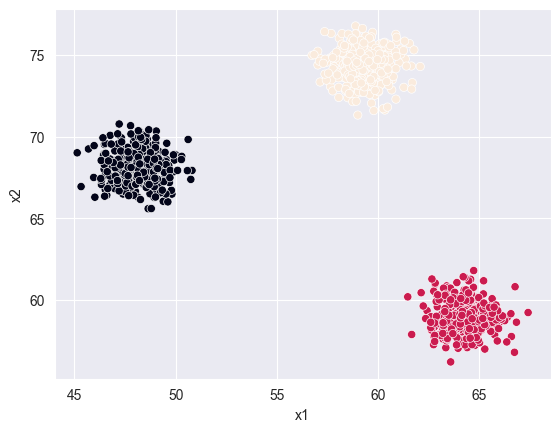

In [11]:
sns.scatterplot(x=df.x1, y=df.x2, c=gm_prediction)

In [12]:
from sklearn.mixture import GaussianMixture
help(GaussianMixture)

Help on class GaussianMixture in module sklearn.mixture._gaussian_mixture:

class GaussianMixture(sklearn.mixture._base.BaseMixture)
 |  GaussianMixture(n_components=1, *, covariance_type='full', tol=0.001, reg_covar=1e-06, max_iter=100, n_init=1, init_params='kmeans', weights_init=None, means_init=None, precisions_init=None, random_state=None, warm_start=False, verbose=0, verbose_interval=10)
 |  
 |  Gaussian Mixture.
 |  
 |  Representation of a Gaussian mixture model probability distribution.
 |  This class allows to estimate the parameters of a Gaussian mixture
 |  distribution.
 |  
 |  Read more in the :ref:`User Guide <gmm>`.
 |  
 |  .. versionadded:: 0.18
 |  
 |  Parameters
 |  ----------
 |  n_components : int, default=1
 |      The number of mixture components.
 |  
 |  covariance_type : {'full', 'tied', 'diag', 'spherical'}, default='full'
 |      String describing the type of covariance parameters to use.
 |      Must be one of:
 |  
 |      - 'full': each component has 

In [13]:
house = pd.read_csv('data/housing.csv')
house

,year,price
0,0.081091,23.790515
1,9.483270,10.784598
2,9.901805,10.003782
3,1.930438,21.879849
4,1.618601,21.851806
...,...,...
1350,12.580032,10.122039
1351,12.488949,9.934954
1352,10.693618,12.083653
1353,12.455530,10.304081


In [14]:
gm_clustering = GaussianMixture(n_components=3, random_state=42)

# обучаем модель 
gm_clustering.fit(house)

# для матрицы X получаем предсказания, к какому кластеру принадлежат объекты
gm_prediction = gm_clustering.predict(house)

<Axes: xlabel='year', ylabel='price'>

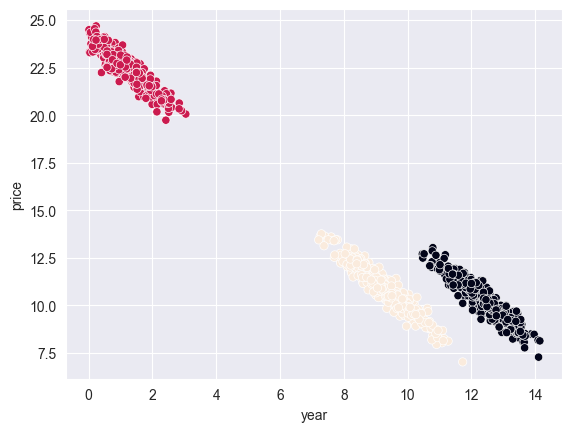

In [15]:
sns.scatterplot(x=house.year, y=house.price, c=gm_prediction)

<Axes: xlabel='year', ylabel='price'>

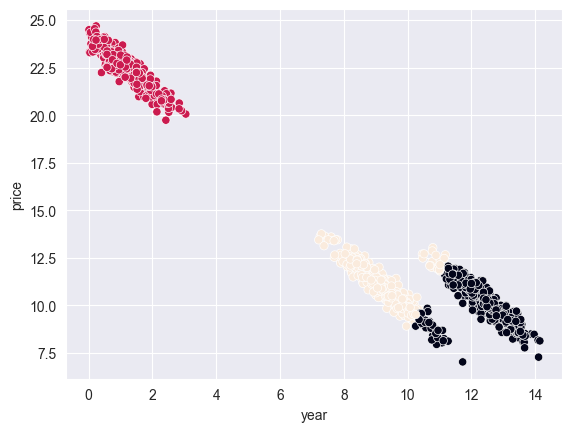

In [16]:
# инициализируем алгоритм k-means, с количеством кластеров 3
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)

# запустим обучение модели
kmeans.fit(house)

# предскажем, к какому кластеру принадлежат покемоны 
predictions = kmeans.predict(house)
# если мы хотим метки класса для тех же данных, на которых обучили модель, то можно просто попросить labels
predictions = kmeans.labels_

# сохраним предсказания в датафрейм
house['Clusters_k3'] = predictions

#визуализируем результаты, параметр c принимает вектор с номерами классов, для группировки объектов по цветам 
sns.scatterplot(x=house.year, y=house.price, c=predictions)

In [17]:
# вызываем из sklearn SpectralClustering 
from sklearn.cluster import SpectralClustering


# запускаем кластеризацию, задав количество кластеров, равное 3 
spectral_clustering = SpectralClustering(n_clusters=3, random_state=42)

spectral_clustering.fit(df[['x1', 'x2']])
# получаем результаты кластеризации
spectral_predictions = spectral_clustering.labels_

<Axes: xlabel='x1', ylabel='x2'>

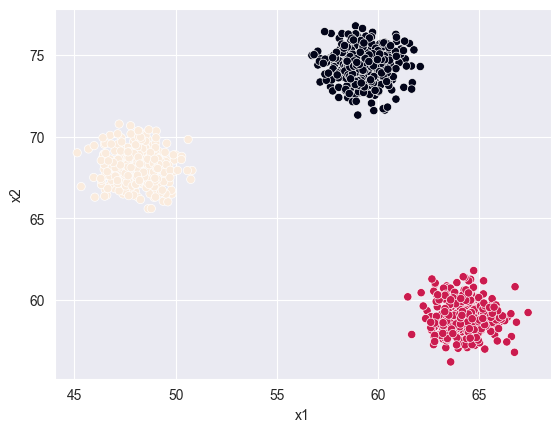

In [18]:
sns.scatterplot(x=df.x1, y=df.x2, c=spectral_predictions)

<Axes: xlabel='x1', ylabel='x2'>

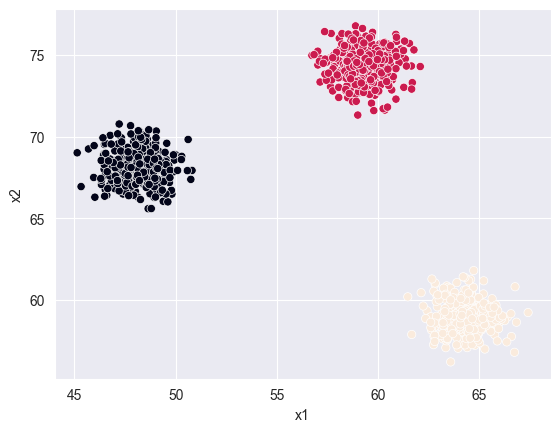

In [19]:
# Импортируем DBSCAN-кластеризацию
from sklearn.cluster import DBSCAN

# Запускаем кластеризацию на наших данных
clustering = DBSCAN(eps=3, min_samples=3).fit(df[['x1', 'x2']])

# Далее можно визуализировать результаты, как мы делали это с алгоритмом k-means
sns.scatterplot(x=df.x1, y=df.x2, c=clustering.labels_)

<Axes: xlabel='year', ylabel='price'>

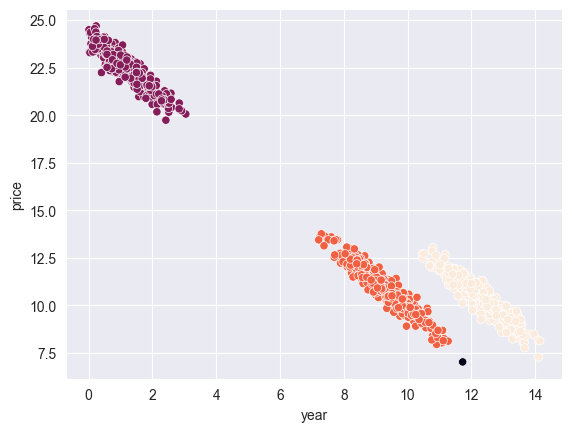

In [20]:
house# Запускаем кластеризацию на наших данных
clustering = DBSCAN(eps = 0.7, min_samples = 6).fit(house[['year', 'price']])

# Далее можно визуализировать результаты, как мы делали это с алгоритмом k-means
sns.scatterplot(x=house.year, y=house.price, c=clustering.labels_)

In [21]:
airbnb = pd.read_csv('data/airbnb.csv')
airbnb

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,89427,The Brooklyn Waverly,116599,Sahr,Brooklyn,Clinton Hill,40.68613,-73.96536,Entire home/apt,650,5,0,NaN,NaN,3,365
346,89621,"WONDERFUL, COMFORTABLE STUDIO",209460,Marylyn,Brooklyn,Bedford-Stuyvesant,40.68048,-73.94911,Entire home/apt,90,3,218,2019-06-28,2.26,4,324
347,93313,MAISON DES SIRENES 2,25183,Nathalie,Brooklyn,Bedford-Stuyvesant,40.68314,-73.93963,Entire home/apt,120,2,75,2019-06-23,0.76,2,237
348,94035,"Modern, Safe, Clean, Bright Room in Astoria for 2",35375,Savannah,Queens,Astoria,40.75961,-73.91117,Private room,80,1,42,2019-07-06,1.21,2,365


<Axes: xlabel='longitude', ylabel='latitude'>

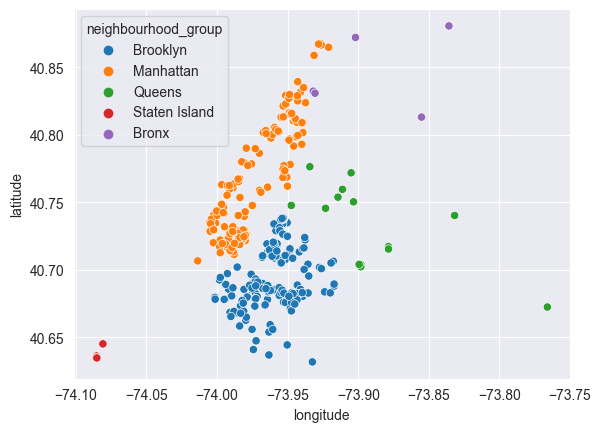

In [22]:
sns.scatterplot(x = airbnb.longitude, y = airbnb.latitude, hue = airbnb.neighbourhood_group)

In [23]:
# инициализируем k-means-кластеризацию с шестью кластерами
kmeans_clustering = KMeans(n_clusters=6)

# обучим k-means-модель кластеризации на данных о широте и долготе, сохраним данные о кластерах в predictions
predictions = kmeans_clustering.fit_predict(airbnb[['latitude', 'longitude']])

# сохраним предсказания в колонку clusters датафрейма
airbnb["clusters"] = predictions


# с помощью метода cluster_centers_ найдём координаты центроидов кластеров, сохраним их в список centroids
centroids = kmeans_clustering.cluster_centers_

# для шести кластеров сохраним в отдельные списки значения координат x и y
centroids_x = [i[0] for i in centroids]
centroids_y = [i[1] for i in centroids]

# зададим цвета для разных кластеров
colors = ['#DF2020', '#81DF20', '#2095DF', '#DF20C8', '#20DFC5', '#DF8520']

# создадим пустые словари, чтобы потом соотнести координаты x и у центроидов разных кластеров, а также цвета 
centroids_x_dict = {}
centroids_y_dict = {}
colors_dict = {}

# итерируемся шесть раз, так как у нас шесть кластеров
for i in range(6):
    # сохраняем в словарь номер кластера в качестве ключа, значение координаты x центроида — в качестве значения
    centroids_x_dict[i] = centroids_x[i]
    # сохраняем в словарь номер кластера в качестве ключа, значение координаты y центроида — в качестве значения
    centroids_y_dict[i] = centroids_y[i]
    # сохраняем в словарь номер кластера в качестве ключа, значение цвета — в качестве значения
    colors_dict[i] = colors[i]

c:\Users\Michael Brown\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [24]:
airbnb['cen_x'] = airbnb.clusters.map(centroids_x_dict) 
airbnb['cen_y'] = airbnb.clusters.map(centroids_y_dict)
airbnb['color'] = airbnb.clusters.map(colors_dict)
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,clusters,cen_x,cen_y,color
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,4,40.677937,-73.967837,#20DFC5
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,3,40.734661,-73.989130,#DF20C8
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,1,40.811245,-73.946022,#81DF20
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,4,40.677937,-73.967837,#20DFC5
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,1,40.811245,-73.946022,#81DF20


<Axes: xlabel='longitude', ylabel='latitude'>

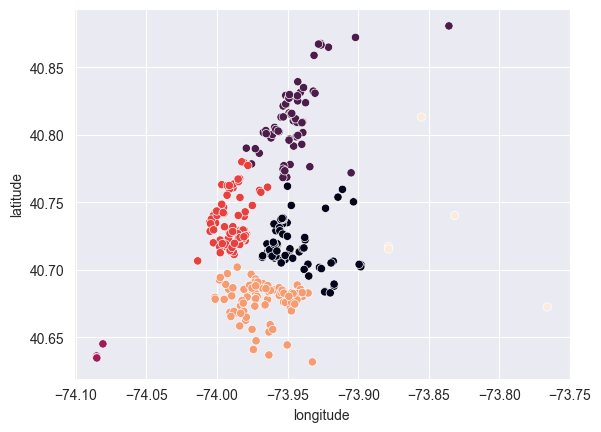

In [25]:
sns.scatterplot(y=airbnb.latitude, x=airbnb.longitude, c=airbnb.clusters)

<Axes: xlabel='longitude', ylabel='latitude'>

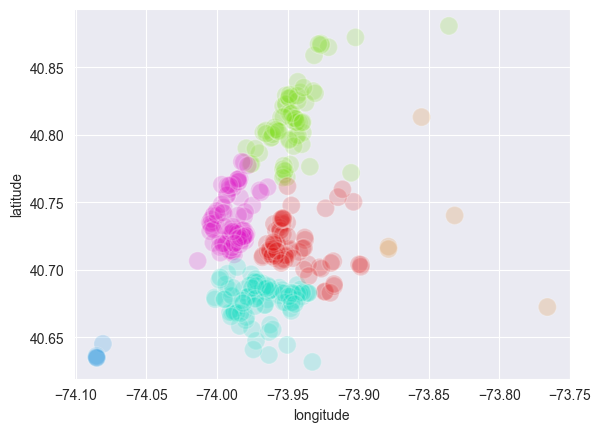

In [26]:
sns.scatterplot(y=airbnb.latitude, x=airbnb.longitude, c=airbnb.color, alpha=0.2, s=170)

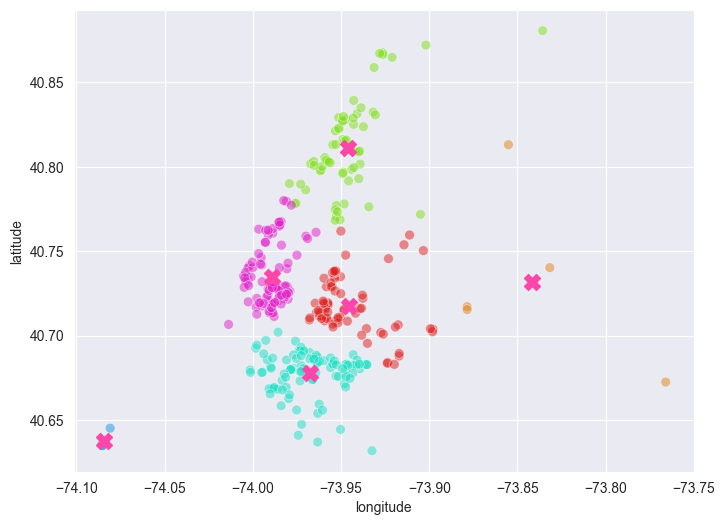

In [27]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(figsize=(8, 6))
# визуализируем элементы датасета
# параметр c отвечает за цвет элемента в зависимости от того, к какому кластеру он принадлежит
# s отвечает за размер объектов на графике, alpha отвечает за прозрачность точек
sns.scatterplot(y=airbnb.latitude, x=airbnb.longitude, c=airbnb.color, s=50, alpha=0.5)
# визуализируем центроиды: отметим их на графике крестиком (marker="X") и зададим им розовый цвет 
plt.scatter(centroids_y, centroids_x, marker="X", c=['#FC46AA'], s=130)

In [28]:
from scipy.spatial import ConvexHull 
import numpy as np

In [29]:
points = np.array([[ 40.64524, -74.08088], [ 40.63536, -74.08537], [ 40.63627, -74.08543], [ 40.63518, -74.08546], [ 40.63481, -74.08519]])
hull = ConvexHull(points)
hull.vertices

array([0, 4, 3, 2], dtype=int32)

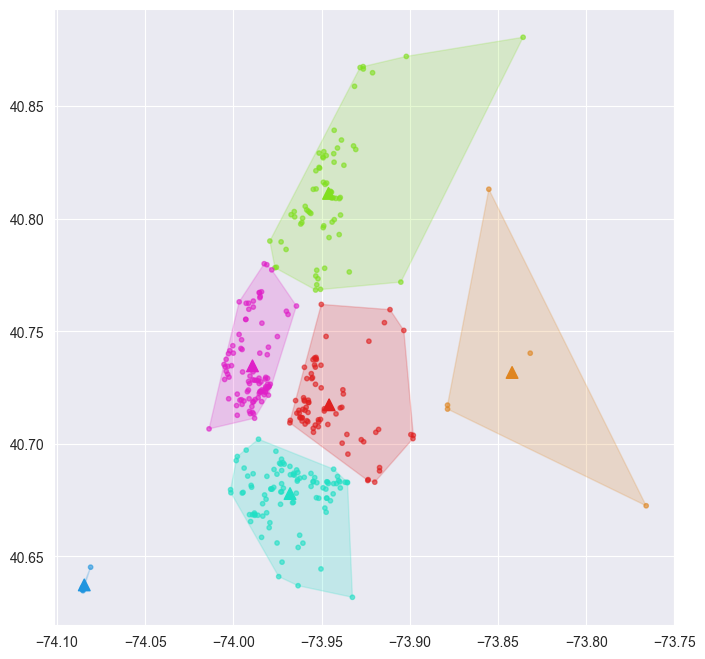

In [30]:
fig, ax = plt.subplots(1, figsize=(8,8))

# визуализируем объекты кластеров и центроиды
plt.scatter(airbnb.longitude, airbnb.latitude, c=airbnb.color, alpha = 0.6, s=10)
plt.scatter(centroids_y, centroids_x, marker='^', c=colors, s=70)

# найдём уникальные значения кластеров и проитерируемся по каждому кластеру
for i in airbnb.clusters.unique():
    # запишем в points значения признаков широты и долготы, принадлежащие к i-му кластеру
    points = airbnb[airbnb.clusters == i][['latitude', 'longitude']].values
 
    hull = ConvexHull(points)
    
    # Запишем координаты оболочки по оси x. Из hull.vertices узнаем индексы элементов, входящих в оболочку.
    # Так как оболочка должна быть замкнутой, то в конце добавляем ещё раз нулевой элемент.
    y_hull = np.append(points[hull.vertices, 0], points[hull.vertices, 0][0]) 
    x_hull = np.append(points[hull.vertices, 1], points[hull.vertices, 1][0]) 
    
    # рисуем оболочку и заливаем её таким же цветом, как и объекты кластера
    plt.fill(x_hull, y_hull, alpha=0.2, c=colors[i])

In [31]:
# импортируем агломеративную кластеризацию из sklearn
from sklearn.cluster import AgglomerativeClustering

# запускаем агломеративную кластеризацию, расстояние между кластерами рассчитываем методом одиночной связи
agglomerative_clustering = AgglomerativeClustering(n_clusters=6, linkage='single')

# обучаем модель и получаем результаты кластеризации
predictions_ag_model = agglomerative_clustering.fit_predict(airbnb[['longitude', 'latitude']])

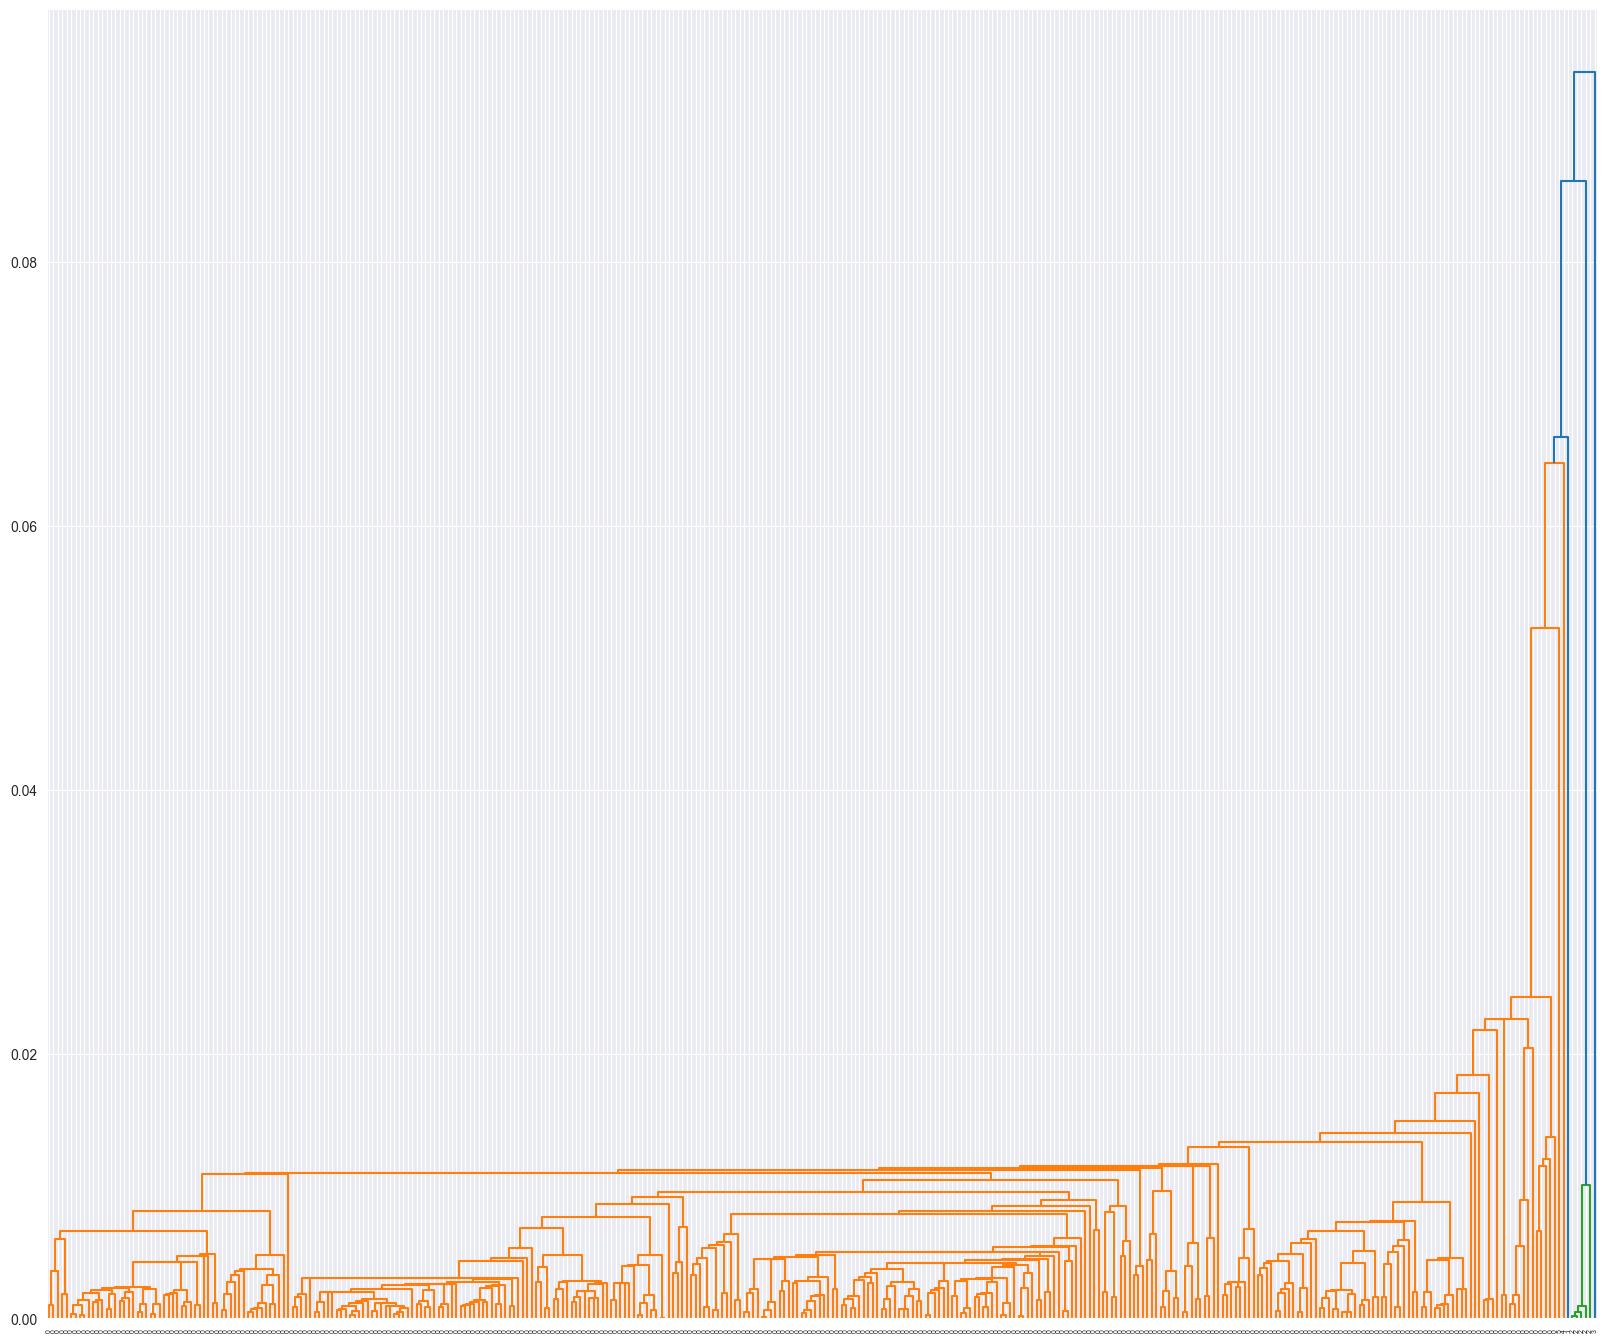

In [32]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

# рассчитаем расстояния между кластерами
linked = linkage(airbnb[["longitude", "latitude"]], 'single')

plt.figure(figsize=(20, 17))

# визуализируем дендрограмму с ориентацией top
# сначала будут отрисовываться кластеры с минимальным расстоянием между ними
dendrogram(Z=linked,
            orientation='top',
            labels=predictions_ag_model,
            distance_sort='descending')

plt.show()

K=1 skipped. Mean computed from data directly.
K=2 fitted in 0.036 seconds.
K=3 fitted in 0.033 seconds.
K=4 fitted in 0.033 seconds.
K=5 fitted in 0.031 seconds.
K=6 fitted in 0.032 seconds.
K=7 fitted in 0.037 seconds.


c:\Users\Michael Brown\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Michael Brown\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Michael Brown\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Michael Brown\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 

K=8 fitted in 0.039 seconds.
K=9 fitted in 0.041 seconds.


c:\Users\Michael Brown\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='Number of clusters (k)', ylabel='PCA weighted mean of the clusters'>

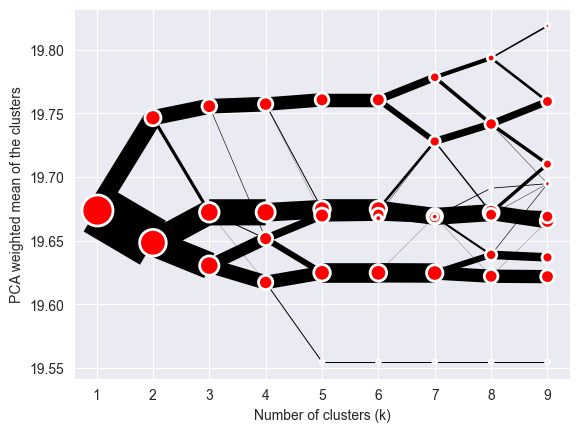

In [33]:
# импортируем библиотеку clustergram
from clustergram import Clustergram

# задаём количество кластеров, для которых хотим получить визуализацию, определяем метод кластеризации
cgram = Clustergram(range(1, 10), method='kmeans')

# запускаем алгоритм
cgram.fit(airbnb[["longitude", "latitude"]])
cgram.plot()

In [34]:
# инициализируем k-means-кластеризацию с шестью кластерами
kmeans_clustering = KMeans(n_clusters=6)

# обучим k-means-модель кластеризации на данных широты, долготы и цены, сохраним данные о кластерах для этих данных в kmeans_predictions
kmeans_predictions = kmeans_clustering.fit_predict(airbnb[['longitude', 'latitude', 'price']])

# сохраним предсказания в колонку clusters датафрейма
airbnb["clusters_3d"] = kmeans_predictions

c:\Users\Michael Brown\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 0, 'price')

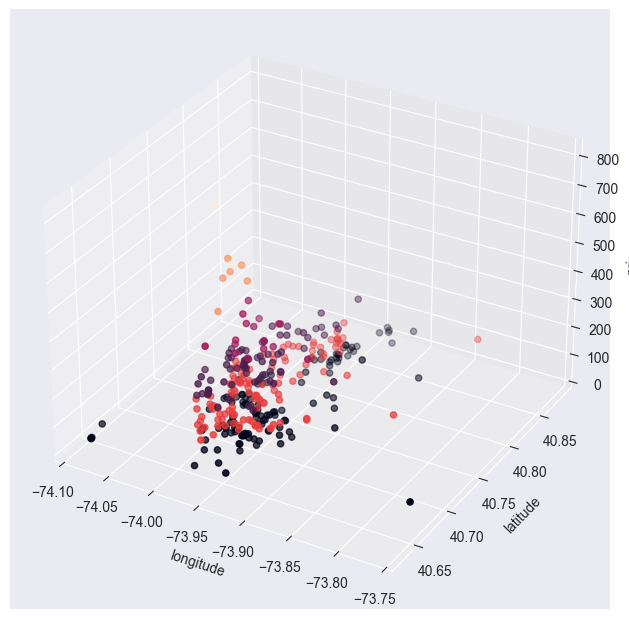

In [35]:
from mpl_toolkits.mplot3d import Axes3D

# создадим трёхмерный объект
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
# добавим дополнительную ось в объект картинки
fig.add_axes(ax)

# визуализируем данные, передав значения x, y, z, а также информацию о группировке данных по цветам
ax.scatter(xs=airbnb.longitude.to_list(), ys=airbnb.latitude.to_list(), zs=airbnb.price.to_list(), c=airbnb.clusters_3d)
# добавим оси
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_zlabel('price')

Text(0.5, 0, 'price')

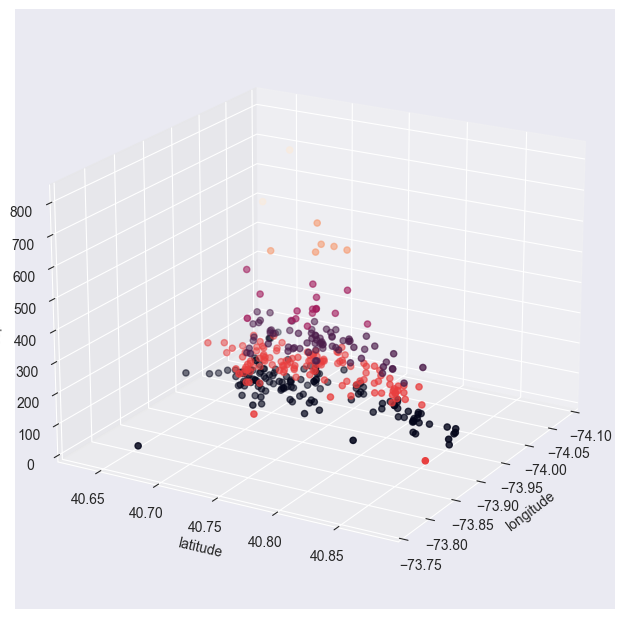

In [36]:
# создадим трёхмерный объект
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
# добавим дополнительную ось в объект картинки
fig.add_axes(ax)

ax.azim = 30
ax.elev = 20

# визуализируем данные, передав значения x, y, z, а также информацию о группировке данных по цветам
ax.scatter(xs=airbnb.longitude.to_list(), ys=airbnb.latitude.to_list(), zs=airbnb.price.to_list(), c=airbnb.clusters_3d)
# добавим оси
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_zlabel('price')

In [37]:
import plotly
import plotly.express as px

# передаём датафрейм и поля, которые нужно использовать для осей абсцисс, ординат и аппликат
# в значение color передаём номера кластеров
fig = px.scatter_3d(
    data_frame=airbnb, 
    x = 'longitude', 
    y = 'latitude', 
    z = 'price', 
    color='clusters', 
    width=1000,
    height=700
)

#отображаем график
fig.show()

In [38]:
# передаём датафрейм и поля, которые нужно использовать для осей абсцисс, ординат и аппликат
# в значение color передаём номера кластеров
fig = px.scatter_3d(
    data_frame=airbnb, 
    x = 'longitude', 
    y = 'latitude', 
    z = 'price', 
    color='neighbourhood_group', 
    width=1000,
    height=700
)

#отображаем график
fig.show()

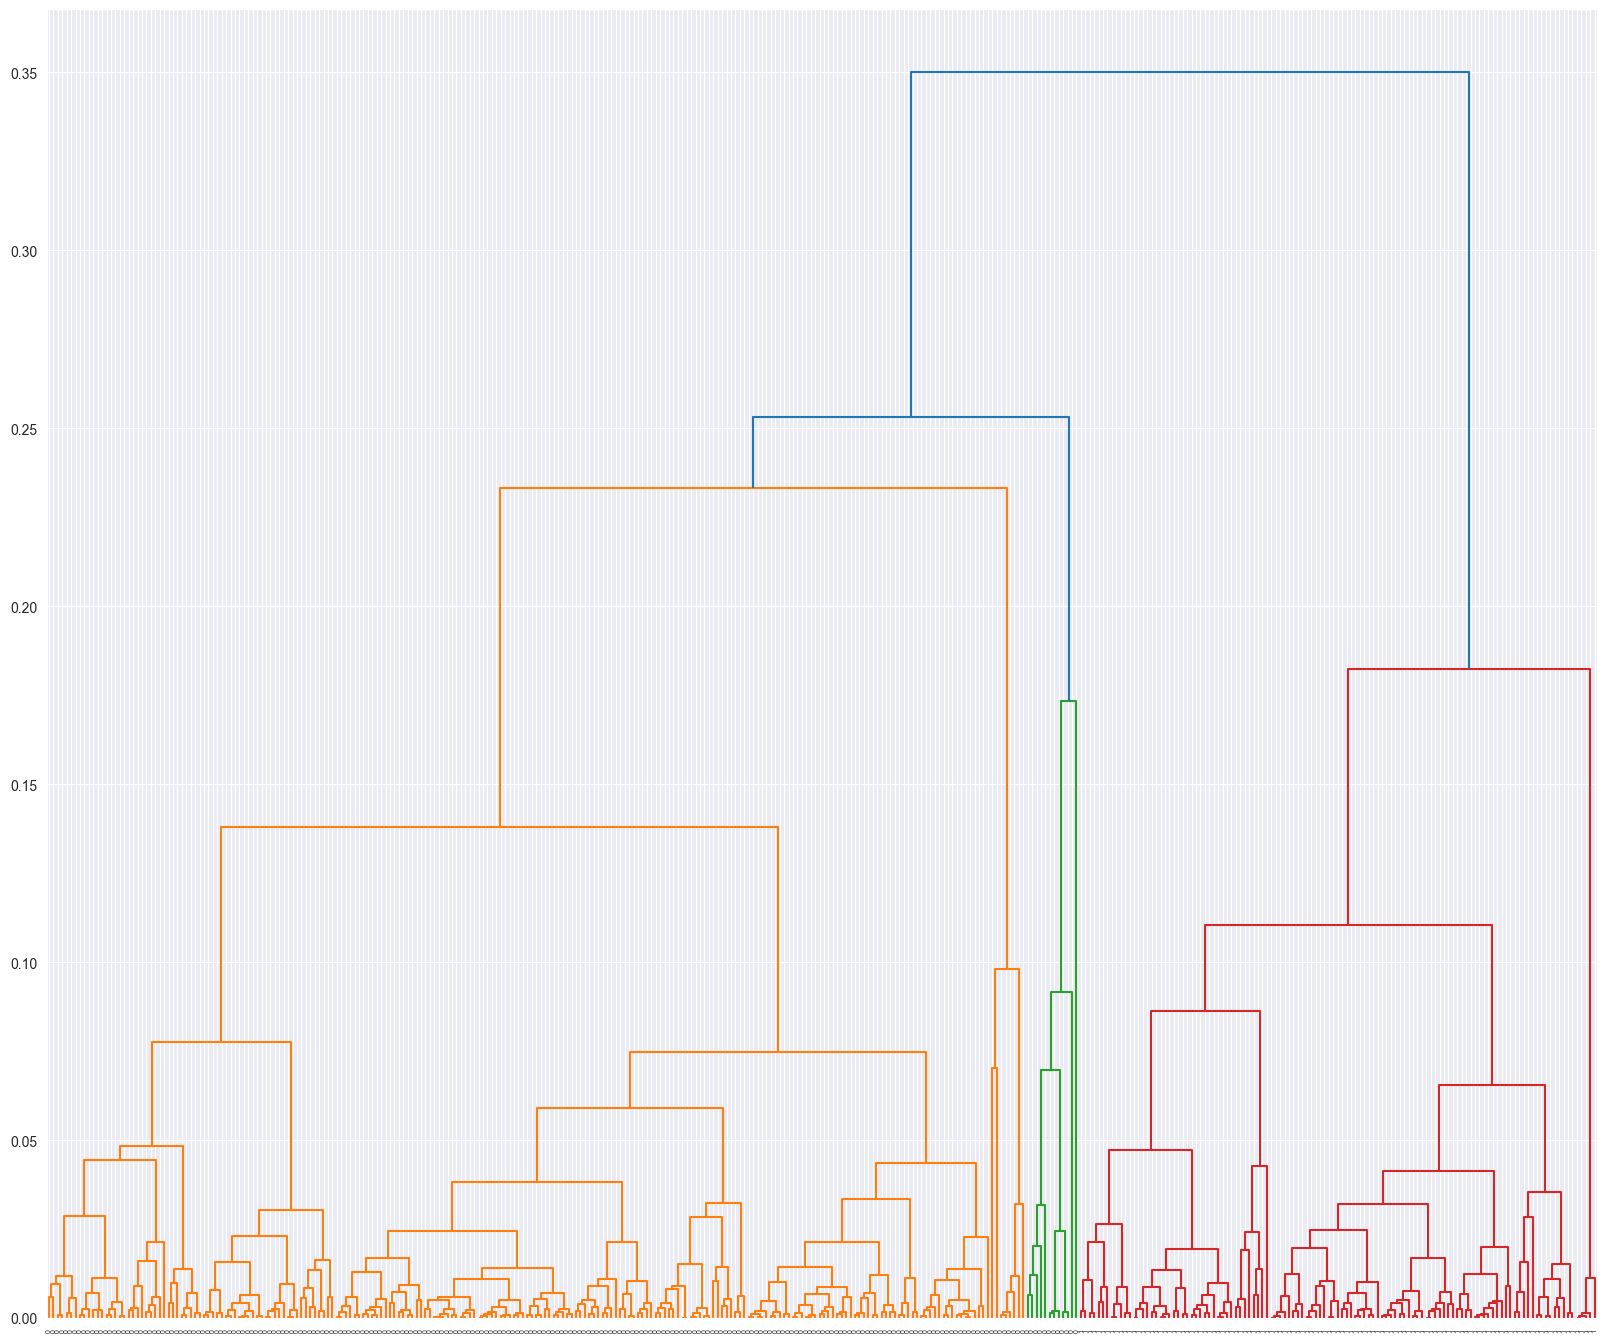

In [39]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt

# запускаем агломеративную кластеризацию c подсчётом расстояния методом полной связи
agglomerative_clustering = AgglomerativeClustering(linkage='complete')
# обучаем модель
predictions_ag_model = agglomerative_clustering.fit_predict(airbnb[['latitude', 'longitude']], )
# рассчитываем расстояния между кластерами с использованием метода полной связи
linked = linkage(airbnb[["latitude", "longitude"]], 'complete')
plt.figure(figsize=(20, 17))

# визуализируем дендрограмму с ориентацией top
dendrogram(Z=linked,
            orientation='top',
            labels=predictions_ag_model,
            distance_sort='descending')

plt.show()

<Axes: xlabel='longitude', ylabel='latitude'>

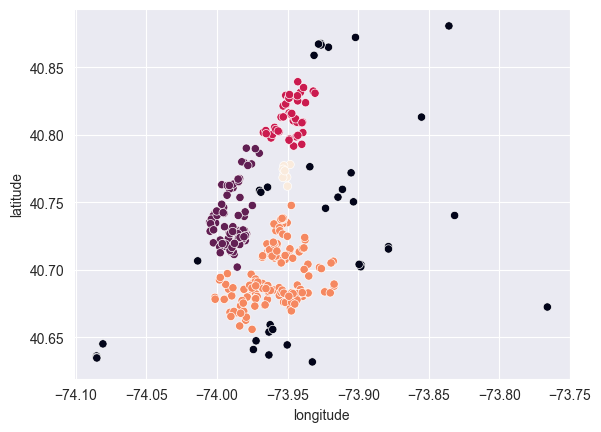

In [40]:
# импортируем DBSCAN кластеризацию
from sklearn.cluster import DBSCAN

#запускаем кластеризацию на наших данных
clustering = DBSCAN(eps=0.012, min_samples=6).fit(airbnb[['longitude', 'latitude']])

# Далее можно визуализировать результаты, как мы делали с алгоритмом k-means
sns.scatterplot(x=airbnb.longitude, y=airbnb.latitude, c=clustering.labels_)

In [41]:
# из модуля decomposition библиотеки sklearn импортируем класс PCA
from sklearn.decomposition import PCA
# создаём объект класса PCA
# n_components — задаём количество компонентов для проведения трансформации
pca = PCA(n_components=2, random_state=42)
# обучаем модель на данных X
pca.fit(X)
# применяем уменьшение размерности к матрице X
pca.transform(X)

array([[-6.89279823, -4.82307892],
       [-2.12187908,  7.40318272],
       [-7.70155325, -4.93523206],
       ...,
       [ 9.59588257, -3.11441423],
       [-7.85099772, -6.36852066],
       [ 9.71333699, -2.16939444]])

In [42]:
pca.fit_transform(X)

array([[-6.89279823, -4.82307892],
       [-2.12187908,  7.40318272],
       [-7.70155325, -4.93523206],
       ...,
       [ 9.59588257, -3.11441423],
       [-7.85099772, -6.36852066],
       [ 9.71333699, -2.16939444]])

In [43]:
# загрузим датасет MNIST
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

dataset = fetch_openml("mnist_784")
# загрузим признаки в переменную X  
X = dataset['data']
# загрузим «ответы» в переменную y
y = dataset['target']
# разделим данные с помощью sklearn на данные для обучения и теста
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.1, random_state=0)

# импортируем StandardScaler для стандартизации данных
from sklearn.preprocessing import StandardScaler

# создадим объект класса StandardScaler
scaler = StandardScaler()
scaler.fit(train_x)
# трансформируем датасеты train_x и test_x
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

# импортируем класс PCA
from sklearn.decomposition import PCA

# создадим объект класса PCA
pca = PCA(n_components=300)
pca.fit(train_x)
# уменьшим размерность данных
train_x_pca = pca.transform(train_x)
test_x_pca = pca.transform(test_x)

c:\Users\Michael Brown\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning:

The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.



In [44]:
print(len(train_x[0]))
print(len(train_x_pca[0]))

784
300


In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from time import time

# напишем функцию, которая на вход принимает X и y, а возвращает модель и время
def get_time_and_accuracy(train_x, train_y, test_x, test_y):
    # создадим объект класса LogisticRegression
    log_reg_model = LogisticRegression(max_iter=1000)
    # запишем время с начала эпохи в секундах до обучения модели
    start_time = time()
    # обучим модель
    log_reg_model.fit(train_x, train_y)    
    # запишем время с начала эпохи в секундах после обучения
    end_time = time()
    # подсчитаем время, потраченное на обучение модели
    delta_time = end_time-start_time
    # предскажем на тестовых данных
    y_pred = log_reg_model.predict(test_x)
    # посчитаем скор для тестового предсказания
    score = accuracy_score(test_y, y_pred)
    # вернём время, потраченное на обучение, и качество полученной модели
    return delta_time, score

##model_pca_time, model_pca_acc = get_time_and_accuracy(train_x_pca, train_y, test_x_pca, test_y)
##print(f"Модель, построенная на признаках, полученных после уменьшения размерности. Время обучения {model_pca_time}, метрика модели {model_pca_acc}")
# Модель, построенная на признаках, полученных после уменьшения размерности. Время обучения 54.12072825431824, метрика модели 0.9255714285714286

##model_time, model_acc = get_time_and_accuracy(train_x, train_y, test_x, test_y)
##print(f"Модель, построенная на всех исходных признаках. Время обучения {model_time}, метрика модели {model_acc}")
# Модель, построенная на всех исходных признаках. Время обучения 108.04033303260803, метрика модели 0.9187142857142857

In [46]:
# импортируем класс TSNE из модуля manifold библиотеки sklearn
from sklearn.manifold import TSNE

# создаём объект класса TSNE
# n_components — размерность нового пространства
##tsne = TSNE(n_components=2, perplexity=30, n_iter=500, random_state=42)
# обучаем модель на данных X и производим трансформацию
##tsne.fit_transform(X)

<Axes: xlabel='0', ylabel='1'>

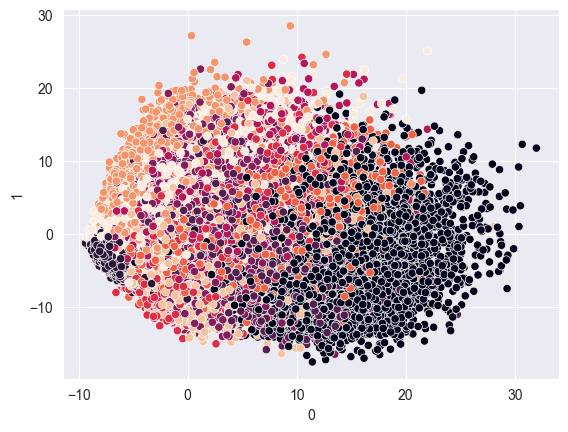

In [47]:
import seaborn as sns

# создадим объект класса PCA, уменьшим размерность данных до 2
pca = PCA(n_components=2, random_state=42)
# уменьшим размерность данных
X_reduced = pca.fit_transform(train_x)
# сохраним данные в датафрейм
df_pca = pd.DataFrame(X_reduced)
# сохраним разметки кластеров
df_pca['c'] = pd.to_numeric(train_y).astype('Int64').to_list()
# визуализируем
sns.scatterplot(x=df_pca[0], y=df_pca[1], c=df_pca['c'])

<Axes: xlabel='0', ylabel='1'>

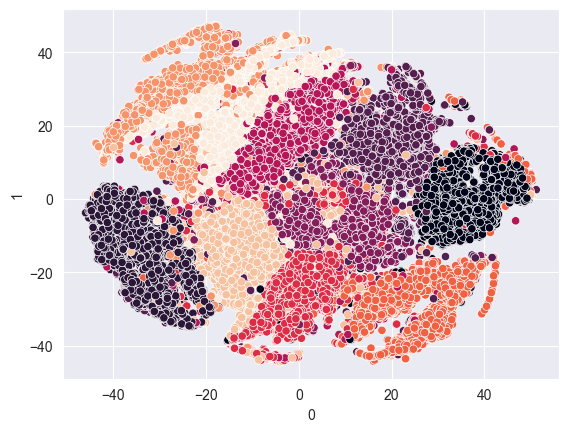

In [48]:
# создадим объект класса TSNE, уменьшим размерность данных до 2
tsne = TSNE(n_components=2, perplexity=50, n_iter=500, random_state=42)
# уменьшим размерность данных
X_reduced = tsne.fit_transform(train_x)
# сохраним данные в датафрейм
df_tsne = pd.DataFrame(X_reduced)
# сохраним разметки кластеров
df_tsne['c'] = pd.to_numeric(train_y).astype('Int64').to_list()
# визуализируем
sns.scatterplot(x=df_tsne[0], y=df_tsne[1], c=df_tsne['c'])

In [49]:
from sklearn import preprocessing 
cust = pd.read_csv('data/segmented_customers.csv')
cust.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19.0,15.0,39.0,4.0
1,2,Male,21.0,15.0,81.0,3.0
2,3,Female,20.0,16.0,6.0,4.0
3,4,Female,23.0,16.0,77.0,3.0
4,5,Female,31.0,17.0,40.0,4.0


In [50]:
cust[cust.isna().any(axis=1)]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
200,201,Female,21.0,NaN,40.0,0.0
201,202,Female,30.0,127.0,NaN,NaN
202,203,Male,80.0,NaN,20.0,NaN
203,204,Male,NaN,16.0,120.0,NaN
204,205,Female,NaN,9.0,80.0,NaN


In [51]:
# пропусков не так много, поэтому мы можем удалить данные с пропусками
cust = cust.dropna()

# переименуем столбцы для более удобной работы
cust.rename(columns = {'CustomerID' : 'customer_id', 'Gender' : 'gender', 
                    'Age': 'age', 'Annual Income (k$)': 'annual_income', 
                    'Spending Score (1-100)': 'spending_score', }, inplace = True)

<Axes: xlabel='annual_income', ylabel='spending_score'>

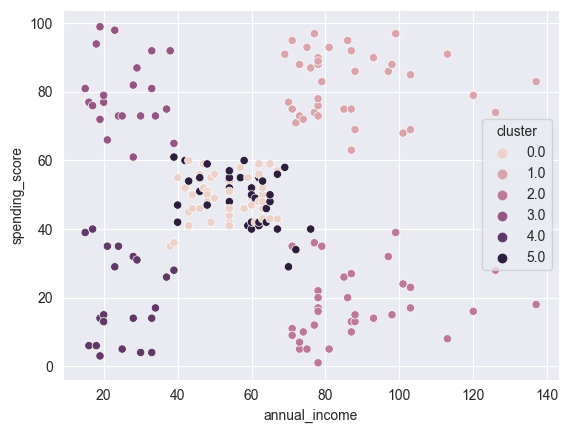

In [52]:
sns.scatterplot(x = cust.annual_income, y = cust.spending_score, hue = cust.cluster)

In [53]:
# проверим, есть ли в данных дубликаты
cust[cust.duplicated(subset=['customer_id'])]

,customer_id,gender,age,annual_income,spending_score,cluster


In [54]:
import plotly
import plotly.express as px

# передаём датафрейм и поля, которые нужно использовать для осей абсцисс, ординат и аппликат
fig = px.scatter_3d(
    data_frame=cust, 
    x = 'age', 
    y = 'annual_income', 
    z = 'spending_score', 
    color = 'gender',
    width=1000,
    height=700
)

#отображаем график
fig.show()

In [55]:
def get_3d_visualization(cust, clust_res):
    fig = px.scatter_3d(
        data_frame=cust, 
        x = 'age', 
        y = 'annual_income', 
        z = 'spending_score', 
        color = clust_res,
        width=1000,
        height=700
    )

    #возвращаем график
    return fig

In [56]:
X = cust[['age', 'annual_income', 'spending_score']]

<Axes: xlabel='annual_income', ylabel='spending_score'>

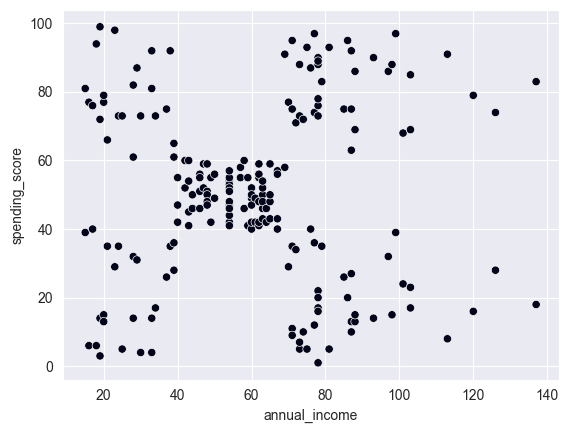

In [57]:
# импортируем DBSCAN кластеризацию
from sklearn.cluster import DBSCAN

#запускаем кластеризацию на наших данных
clustering = DBSCAN().fit(cust[['annual_income', 'spending_score']])

# Далее можно визуализировать результаты, как мы делали с алгоритмом k-means
sns.scatterplot(x=cust.annual_income, y=cust.spending_score, c=clustering.labels_)

In [58]:
# импортируем DBSCAN-кластеризацию
from sklearn.cluster import DBSCAN

#запускаем кластеризацию на наших данных
dbscan = DBSCAN(eps=11)
clustering_dbscan_res = dbscan.fit_predict(X)
cust['dbscan_res_eps_11'] = clustering_dbscan_res

get_3d_visualization(cust, 'dbscan_res_eps_11')

In [59]:
# импортируем алгомеративную кластеризацию из sklearn
from sklearn.cluster import AgglomerativeClustering

# напишем функцию, которая будет проводить алгомеративную кластеризацию
# на вход она будет принимать X — матрицу с признаками для кластеризации и n_clusters — количество кластеров,
# на выходе будет возвращать список с номерами кластеров
def get_aggl_clustering(X, n_clusters):
    # запустим агломеративную кластеризацию
    agglomerative_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    # обучим модель агломеративной кластеризации
    agglomerative_clustering.fit(X)
    # получим список c информацией, к какому кластеру относятся объекты
    aggl_prediction = agglomerative_clustering.labels_
    # вернём список с результатами
    return aggl_prediction

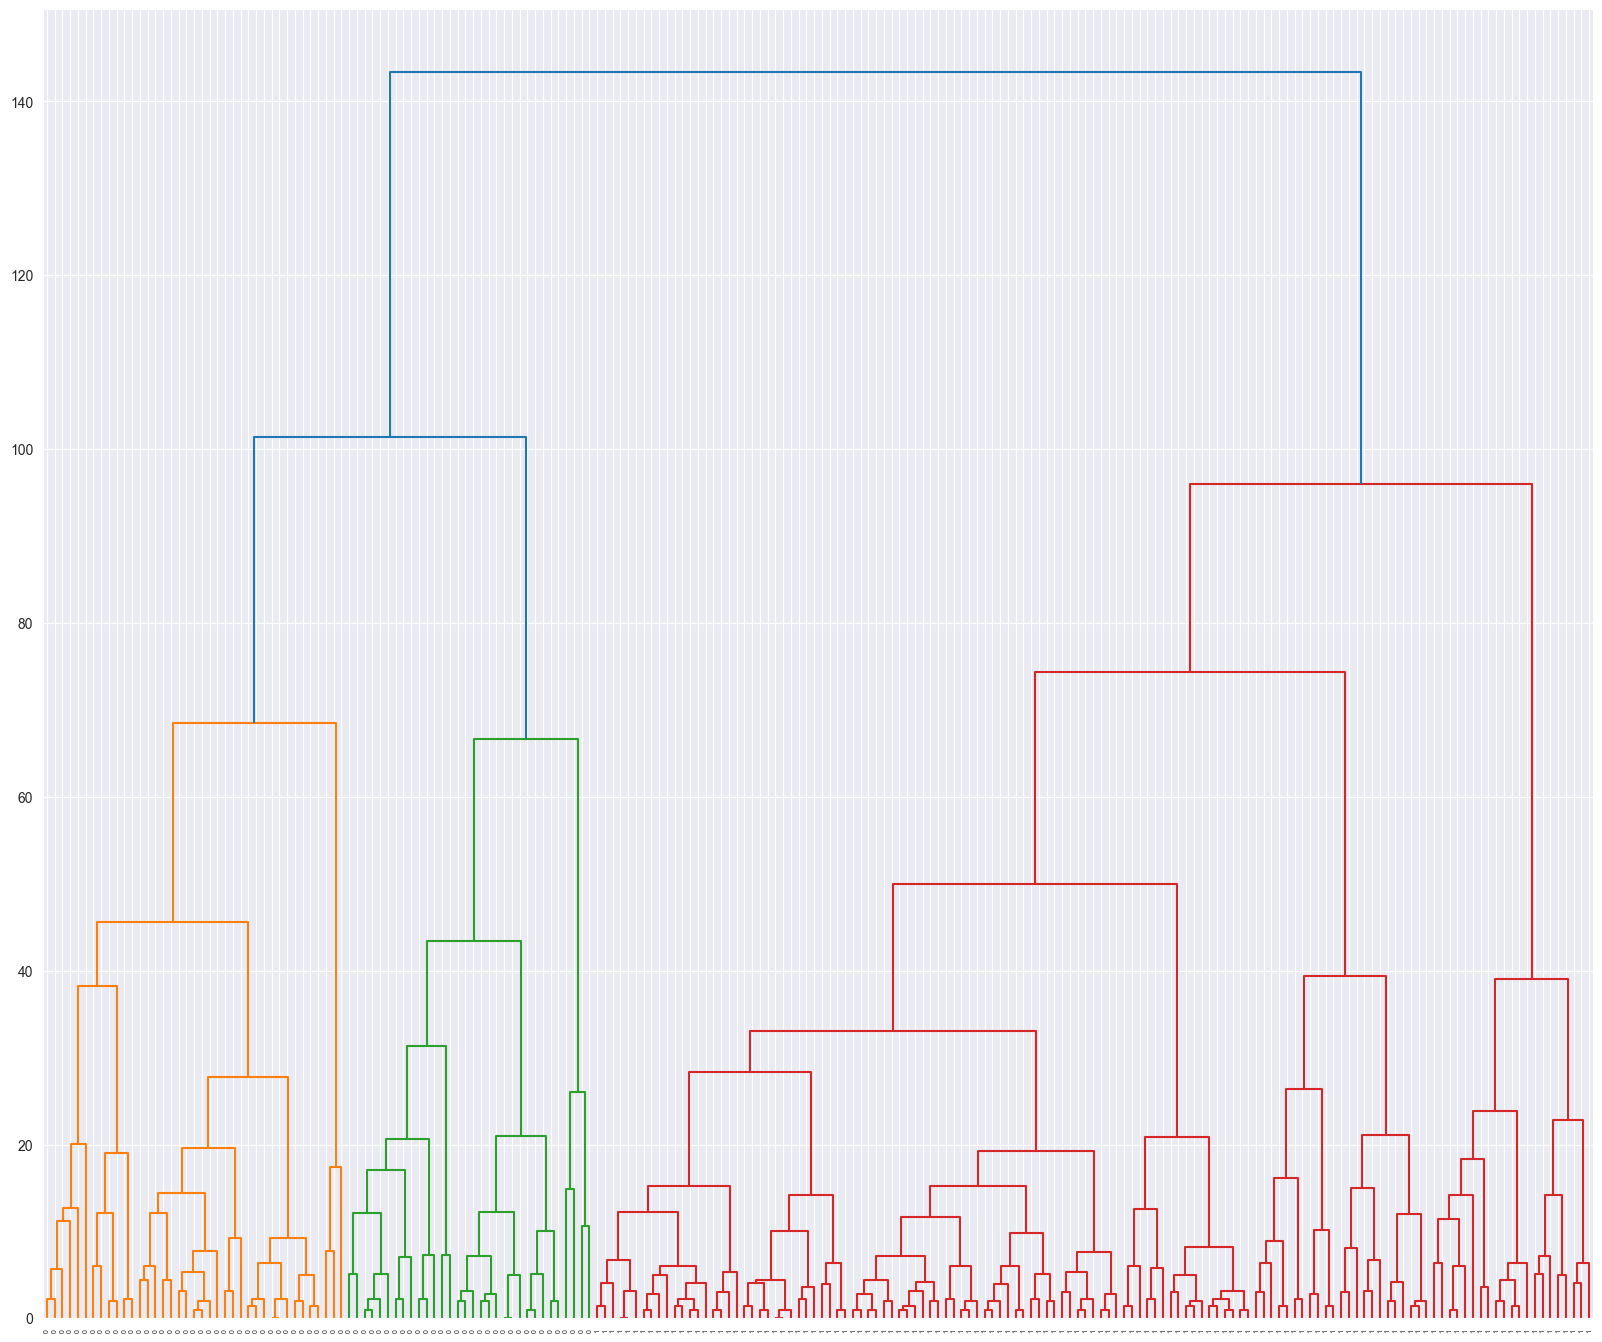

In [62]:
# запускаем агломеративную кластеризацию c подсчётом расстояния методом полной связи
agglomerative_clustering = AgglomerativeClustering(linkage='complete')
# обучаем модель
predictions_ag_model = agglomerative_clustering.fit_predict(cust[['annual_income', 'spending_score']], )
# рассчитываем расстояния между кластерами с использованием метода полной связи
linked = linkage(cust[['annual_income', 'spending_score']], 'complete')
plt.figure(figsize=(20, 17))

# визуализируем дендрограмму с ориентацией top
dendrogram(Z=linked,
            orientation='top',
            labels=predictions_ag_model,
            distance_sort='descending')

plt.show()

In [63]:
cust['aggl_res_6'] = get_aggl_clustering(cust[['age', 'annual_income', 'spending_score']], 6)
get_3d_visualization(cust, 'aggl_res_6')

<Axes: xlabel='cluster', ylabel='silhouette'>

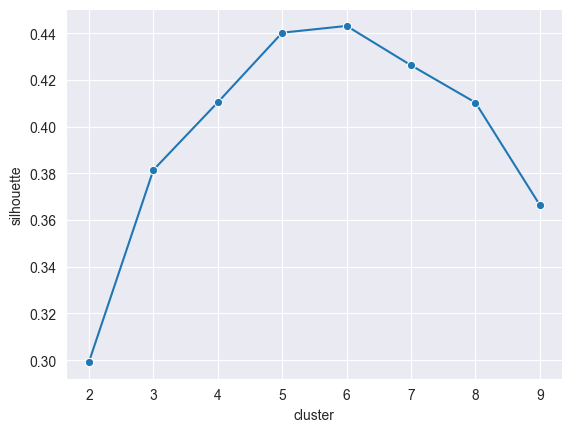

In [64]:
from sklearn.metrics import silhouette_score
import seaborn as sns

# напишем функцию для подсчёта коэффициента силуэта
def get_silhouette_agg_clust(X, cluster_num):
    # проведём агломеративную кластеризацию с заданным количеством кластеров
    res = get_aggl_clustering(X, cluster_num)
    # рассчитаем коэффициент силуэта
    silhouette = silhouette_score(X, res)
    return silhouette


# создадим пустой словарь, ключами будут коэффициент силуэта и количество кластеров
silhouette_res = {"silhouette": [], "cluster": []}


for cluster_num in range(2, 10):
    silhouette_res["silhouette"].append(get_silhouette_agg_clust(X, cluster_num))
    silhouette_res["cluster"].append(cluster_num)

# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker="o")

In [65]:
from sklearn.metrics.cluster import completeness_score

print(completeness_score(labels_true=cust.cluster, labels_pred=cust.aggl_res_6))

0.9012847747610448
